# Loading and preliminary exploration of MOMI data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import missingno as msno 

In [2]:
# Prenatal Data
parent = os.path.dirname(os.getcwd())
dataPath = os.path.join(parent, r"Data/MOMI/Final_Prenatal_DeIdentified.xlsx")
prenatal = pd.read_excel('file://' + dataPath)

In [3]:
# MOMI Data
parent = os.path.dirname(os.getcwd())
dataPath = os.path.join(parent, r"Data/MOMI/Final_MOMI_DeIdentified_Update_39Mar2021.xlsx")
momi = pd.read_excel('file://' + dataPath)

In [4]:
# Ultrasound Data
parent = os.path.dirname(os.getcwd())
dataPath = os.path.join(parent, r"Data/MOMI/Final_Ultrasound_DeIdentified.xlsx")
ultrasound = pd.read_excel('file://' + dataPath)

In [25]:
momi.shape

(234965, 98)

In [26]:
momi.columns

Index(['MOMI_ID', 'Delivery_Number_Per_Mother', 'DeliveryYear',
       'Has_Prenatal_Data', 'Has_Ultrasound_PlacLoc', 'DMOMAGE',
       'FatherAge_State', 'MomEducation_State', 'DadEducation_State',
       'NumCig3MoPriorToPreg_State', 'NumCigFirstTri_State',
       'NumCigSecondTri_State', 'NumCigThirdTri_State', 'Smoke_a', 'Smoke_b',
       'Alcohol_a', 'Alcohol_b', 'Race', 'Ethnicity', 'DFC', 'DELWKSGT',
       'MHXGRAV', 'MHXPARA', 'MHXABORT', 'PRIMIP', 'DMOMHGT', 'MOBRPWT',
       'MOBADMWT', 'FOBLABHR', 'FOBROMHR', 'CSREPEAT', 'FDELTYPE', 'MMULGSTD',
       'SINGLETON', 'FOBDEATH', 'MCNSMUSC', 'MCOLVASC', 'MCVDANAT', 'MCVDHTN',
       'MOBHTN', 'Gest_HTN', 'Mild_PE', 'Severe_PE', 'SIPE', 'Unspecified_HTN',
       'MDELCOMP', 'MDEPRESS', 'MENDDIAB', 'MENDTHY', 'MGIHYPER', 'MGILGBP',
       'MGUINFER', 'MGURENAL', 'MHEARTOPER', 'MHEMANEM', 'MHEMHGB', 'MHEMPLT',
       'MHEMTRAN', 'MIDBV', 'MIDCHLAM', 'MIDCONDY', 'MIDGBS', 'MIDGC',
       'MIDHEPB', 'MIDHSV', 'MIDTB', 'MIDTRICH', 'M

In [27]:
for c in momi.columns:
    print(f'----{c}----')
    print(momi[c].value_counts())
    print('')

----MOMI_ID----
15966726991979    12
72533917991982    10
24597557991986     9
18514468991977     9
95391216991982     9
                  ..
61936924991986     1
43855429991976     1
41849936991965     1
61775735991992     1
94442223991987     1
Name: MOMI_ID, Length: 153987, dtype: int64

----Delivery_Number_Per_Mother----
1     157973
2      56712
3      15101
4       3749
5        972
6        306
7        102
8         37
9          9
10         2
12         1
11         1
Name: Delivery_Number_Per_Mother, dtype: int64

----DeliveryYear----
2013    10960
2014    10835
2012    10663
2011    10329
2009     9986
2010     9958
2015     9886
2008     9784
2007     9565
2020     9303
2019     9299
2016     9150
2006     9066
2005     8995
2017     8826
2018     8562
1996     8429
1995     8409
2004     8341
2001     8183
1997     8035
2003     8028
2002     7996
2000     7964
1998     7324
1999     7089
Name: DeliveryYear, dtype: int64

----Has_Prenatal_Data----
0    188301
1     46664



----Venous_HTN----
0    234964
1         1
Name: Venous_HTN, dtype: int64

----Vitamin_D_Deficiency----
0    234891
1        74
Name: Vitamin_D_Deficiency, dtype: int64

----History_PTB----
0    234876
1        89
Name: History_PTB, dtype: int64

----Hist_Trophoblastic_Disease_2----
0    234911
1        54
Name: Hist_Trophoblastic_Disease_2, dtype: int64

----Infant_Number----
1     153987
2      58796
3      16306
4       4235
5       1106
6        348
7        119
8         48
9         16
10         2
12         1
11         1
Name: Infant_Number, dtype: int64

----InfSex----
M    119393
F    112954
U         6
f         1
Name: InfSex, dtype: int64

----NICULOS----
0.0      183049
1.0        5238
2.0        2672
3.0        1948
7.0        1535
          ...  
141.0         1
139.0         1
194.0         1
137.0         1
159.0         1
Name: NICULOS, Length: 166, dtype: int64

----IDEMBWT----
3250.0    761
3350.0    756
3340.0    753
3210.0    738
3230.0    735
         ... 
108

In [17]:
len(momi['MOMI_ID'].unique())

153987

So there are 153,987 unique moms in the dataset

In [27]:
momi.head()

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,Has_Prenatal_Data,Has_Ultrasound_PlacLoc,DMOMAGE,FatherAge_State,MomEducation_State,DadEducation_State,NumCig3MoPriorToPreg_State,...,History_PTB,Hist_Trophoblastic_Disease_2,Infant_Number,InfSex,NICULOS,IDEMBWT,IGROWTH,ICNSANAT,IIDSYPH,IIDUTI
0,11111167991974,1,1996,0,0,22.0,NaN,NaN,NaN,NaN,...,0,0,1,M,0.0,1200.0,1.0,0.0,0.0,0.0
1,11111167991974,2,1998,0,0,24.0,NaN,NaN,NaN,NaN,...,0,0,2,F,0.0,2988.0,0.0,0.0,0.0,0.0
2,11111281991979,1,2007,0,0,28.0,NaN,NaN,NaN,NaN,...,0,0,1,F,0.0,3560.0,0.0,0.0,0.0,0.0
3,11111281991979,2,2009,0,0,30.0,NaN,NaN,NaN,NaN,...,0,0,2,F,0.0,3355.0,0.0,0.0,0.0,0.0
4,11111281991979,3,2011,0,0,32.0,34.0,Bachelor's degree,Master's degree,0.0,...,0,0,3,M,0.0,4025.0,0.0,0.0,0.0,0.0


In [6]:
prenatal.head()

,MOMI_ID,Delivery_Number_Per_Mother,DeliveryYear,DELWKSGT,MMULGSTD,SINGLETON,PNV_Total_Number,PNV_GestAge,PNV_BP,PNV_Weight_Oz
0,98174825991981,3,2018,36.857143,10,1,7.0,8.285714,102/70,3024.0
1,98174825991981,3,2018,36.857143,10,1,7.0,9.714286,120/60,3056.0
2,98174825991981,3,2018,36.857143,10,1,7.0,14.857143,110/66,3184.0
3,98174825991981,3,2018,36.857143,10,1,7.0,19.857143,110/70,3289.0
4,98174825991981,3,2018,36.857143,10,1,7.0,25.857143,110/70,3395.0


In [5]:
prenatal.columns

Index(['MOMI_ID', 'Delivery_Number_Per_Mother', 'DeliveryYear', 'DELWKSGT',
       'MMULGSTD', 'SINGLETON', 'PNV_Total_Number', 'PNV_GestAge', 'PNV_BP',
       'PNV_Weight_Oz'],
      dtype='object')

In [6]:
for c in prenatal.columns:
    print(f'----{c}----')
    print(prenatal[c].value_counts())
    print('')

----MOMI_ID----
69829958991994    52
81587199991987    51
55736198991994    50
31755233991991    50
98866858991992    49
                  ..
76482981991987     1
47292967991988     1
74355553991982     1
25637813991993     1
37897869991987     1
Name: MOMI_ID, Length: 43969, dtype: int64

----Delivery_Number_Per_Mother----
1     276727
2     130771
3      40955
4      11165
5       3053
6       1027
7        366
8         97
9         26
10        10
12         3
11         1
Name: Delivery_Number_Per_Mother, dtype: int64

----DeliveryYear----
2019    84006
2016    80024
2020    78643
2018    77227
2017    75062
2015    69239
Name: DeliveryYear, dtype: int64

----DELWKSGT----
39.000000    33654
39.142857    19730
40.000000    17320
39.285714    15354
39.857143    15219
             ...  
16.428571        1
43.285714        1
39.142857        1
43.142857        1
17.571429        1
Name: DELWKSGT, Length: 313, dtype: int64

----MMULGSTD----
10    453405
2       8915
1       1476
5     

In [10]:
ultrasound.shape

(221277, 17)

In [9]:
ultrasound.head()

,MOMI_ID,DeliveryYear,Delivery_Number_Per_Mother,DELWKSGT,MMULGSTD,SINGLETON,USExamCategory,USExamType,USGestAge,USGestAgeType,FetusNumber,USPlacLoc_1,USPlacLoc_2,USPlacLoc_3,USPlacLoc_4,USPlacLoc_5,USPlacLoc_6
0,75721299991966,2011,1,39.0,10,1,Obstetric,Complete,22.1,LMP,1,1,NaN,NaN,NaN,NaN,NaN
1,75721299991966,2011,1,39.0,10,1,Obstetric,FollowUp,30.3,LMP,1,1,NaN,NaN,NaN,NaN,NaN
2,81155213991973,2011,1,37.0,10,1,Obstetric,FirstTrimester,9.7,LMP,1,8,NaN,NaN,NaN,NaN,NaN
3,81155213991973,2011,1,37.0,10,1,Obstetric,FirstTrimester,13.1,LMP,1,4,5.0,NaN,NaN,NaN,NaN
4,81155213991973,2011,1,37.0,10,1,Obstetric,Complete,19.4,LMP,1,1,NaN,NaN,NaN,NaN,NaN


In [7]:
ultrasound.columns

Index(['MOMI_ID', 'DeliveryYear', 'Delivery_Number_Per_Mother', 'DELWKSGT',
       'MMULGSTD', 'SINGLETON', 'USExamCategory', 'USExamType', 'USGestAge',
       'USGestAgeType', 'FetusNumber', 'USPlacLoc_1', 'USPlacLoc_2',
       'USPlacLoc_3', 'USPlacLoc_4', 'USPlacLoc_5', 'USPlacLoc_6'],
      dtype='object')

In [8]:
for c in ultrasound.columns:
    print(f'----{c}----')
    print(ultrasound[c].value_counts())
    print('')

----MOMI_ID----
35243577991982    140
72461946991978     60
31676118991982     60
74244418991986     59
88364615991995     56
                 ... 
99127148991980      1
64494431991989      1
48474724991979      1
72632552991983      1
22948915991988      1
Name: MOMI_ID, Length: 63452, dtype: int64

----DeliveryYear----
2014    29028
2013    28066
2019    26950
2012    24421
2018    22140
2020    21003
2017    19179
2015    17310
2016    16580
2011    16429
2010      171
Name: DeliveryYear, dtype: int64

----Delivery_Number_Per_Mother----
1    178369
2     36459
3      5196
4       948
5       230
6        53
7        14
8         8
Name: Delivery_Number_Per_Mother, dtype: int64

----DELWKSGT----
39.000000    35540
40.000000    19617
38.000000    16349
37.000000    15691
41.000000    11185
             ...  
20.285714        1
17.571429        1
17.142857        1
44.000000        1
43.142857        1
Name: DELWKSGT, Length: 305, dtype: int64

----MMULGSTD----
10    196109
2      2199

In [ ]:
ultrasound.rename(columns={})

## Missing Values

In [29]:
# Fix MOMI missing values to np.NaN
momi['MIDBV'] = np.where(momi['MIDBV'] == 99, np.NaN, momi['MIDBV'])
momi['MIDCHLAM'] = np.where(momi['MIDCHLAM'] == 99, np.NaN, momi['MIDCHLAM'])
momi['MIDCONDY'] = np.where(momi['MIDCONDY'] == 99, np.NaN, momi['MIDCONDY'])
momi['MIDGC'] = np.where(momi['MIDGC'] == 99, np.NaN, momi['MIDGC'])
momi['MIDHEPB'] = np.where(momi['MIDHEPB'] == 99, np.NaN, momi['MIDHEPB'])
momi['MIDTRICH'] = np.where(momi['MIDTRICH'] == 99, np.NaN, momi['MIDTRICH'])
momi['MIDGBS'] = np.where(momi['MIDGBS'] == 99, np.NaN, momi['MIDGBS'])
momi['MomEducation_State'] = np.where(momi['MomEducation_State'] == 'Unknown', np.NaN, momi['MomEducation_State'])
momi['DadEducation_State'] = np.where(momi['DadEducation_State'] == 'Unknown', np.NaN, momi['DadEducation_State'])
momi['Smoke_b'] = np.where(momi['Smoke_b'] == 'Unknown (unable to assess)', np.NaN, momi['Smoke_b'])
momi['Race'] = np.where(momi['Race'].isin(['D', 9]), np.NaN, momi['Race'])
momi['Ethnicity'] = np.where(momi['Ethnicity'].isin(['DECLINED', 'UNSPECIFIED']), np.NaN, momi['Ethnicity'])
momi['InfSex'] = np.where(momi['InfSex'] == 'U', np.NaN, momi['InfSex'])
momi['InfSex'] = np.where(momi['InfSex'] == 'f', 'F', momi['InfSex'])

In [ ]:
msno.matrix(momi)

<AxesSubplot:>

# Missingness Heatmap
A value near -1 means if one variable appears then the other variable is very likely to be missing.

A value near 0 means there is no dependence between the occurrence of missing values of two variables.

A value near 1 means if one variable appears then the other variable is very likely to be present.

<AxesSubplot:>

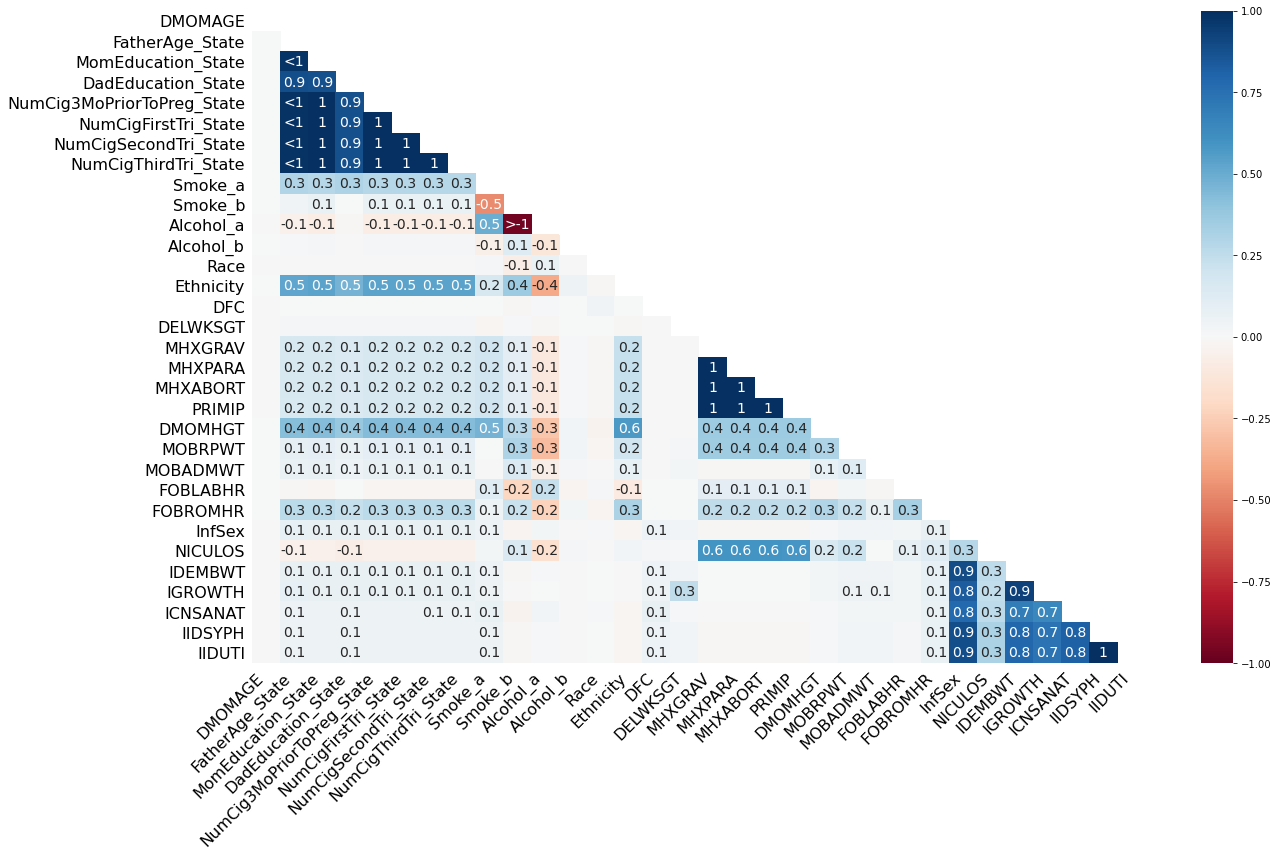

In [31]:
msno.heatmap(momi)

In [35]:
momi.iloc[:,5:].isnull().sum()

DMOMAGE                            3
FatherAge_State               144396
MomEducation_State            143021
DadEducation_State            157059
NumCig3MoPriorToPreg_State    142784
                               ...  
IDEMBWT                         3030
IGROWTH                         3491
ICNSANAT                        1828
IIDSYPH                         2754
IIDUTI                          2754
Length: 93, dtype: int64

<AxesSubplot:>

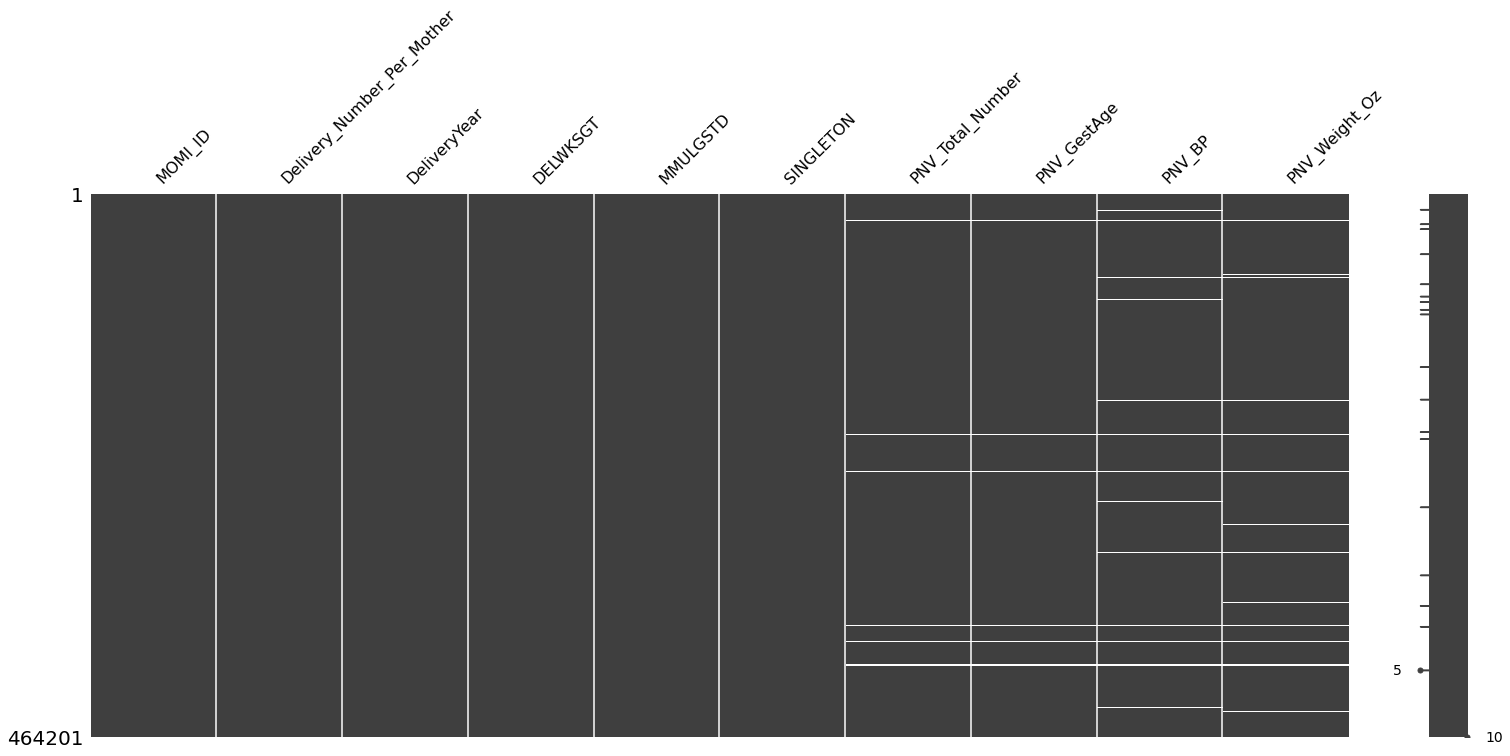

In [15]:
msno.matrix(prenatal)

# Rename Variables

In [ ]:
momi.rename(columns={"DMOMAGE": "MotherAge", "FatherAge_State": "FatherAge", "DFC": "Insurance",
                    "DELWKSGT": "GestationalAgeinWeeks", "MHXGRAV": "TotalNumPregnancies", "MHXPARA": "DeliveriesPriorAdmission",
                    "MHXABORT": "TotalAbortions", "PRIMIP": "Primagrivada", "DMOMHGT": "MaternalHeightMeters",
                    "MOBRPWT": "PrePregWeight", "MOBADMWT": "WeightAtAdmission", "FOBLABHR": "HoursLaborToDelivery",
                    "FOBROMHR": "HoursMembraneReptureDelivery", "CSREPEAT": "RepeatCesarean", "FDELTYPE": "DeliveryMethod",
                    "MMULGSTD": "OutcomeOfDelivery", "FOBDEATH": "FetalDeath", "MCNSMUSC": "MaternalNeuromuscularDisease",
                    "MCOLVASC": "MCollagenVascularDisease", "MCVDANAT": "MStructuralHeartDiseas", "MCVDHTN":"ChronicHypertension",
                    "MOBHTN": "PregRelatedHypertension", "MDELCOMP": "MPostPartumComplications", "MDEPRESS": "Depression",
                    "MENDDIAB": "DiabetesMellitus", "MENDTHY": "ThyroidDisease", "MGIHYPER": "HyperemesisGravidarum",
                    "MGILGBP": "MLiverGallPanc", "MGUINFER": "HistoryInfertility", "MGURENAL": "KidneyDisease",
                    "MHEARTOPER": "OperationsOnHeartandPericardium", "MHEMANEM": "MAnemiaWOHemoglobinopathy",
                    "MHEMHGB": "MHemoglobinopathy", "MHEMPLT": "Thrombocytopenia", "MHEMTRAN": "TransfusionOfPRBC",
                    "MIDBV": "BacterialVaginosis", "MIDCHLAM": "Chlamydia", "MIDCONDY": "Condylomata",
                    "MIDGBS":"GroupBStrep", "MIDGC": "GonococcalInfection", "MIDHEPB": "HepBInfection",
                    "MIDHSV": "Herpes", "MIDTB": "Tuberculosis", "MIDTRICH": "Trichomonas", "MIDVIRPR": "ViralOrProtoInf",
                    "MINTERINJ": "ThoraxAbPelvInjuries", "MMORTECLAMP": "Eclampsia", "MMORTHEARTFAIL": "HeartFailure",
                    "MMORTRENAL": "AcuteRenalFailure", "MMORTSICKLECELL": "SickleCell", "MOBPRECS": "PreviousCesarean",
                    "MPULASTH": "Asthma", "MTOXCOC": "Cocaine", "MTOXNARC": "Opioid", "MTOXOTHR": "OtherSubstanceAbuse",
                    "MTOXTHC": "Marijuana", "IDEMBWT": "InfantWeightGrams", "IGROWTH": "GestWeightCompare",
                    "ICNSANAT": "CNSAbnormality", "IIDSYPH": "CongenitalSyphilis", "IIDUTI": "UTI"})